##**Predictive Modeling for Revenue Growth Using Online Retail II Dataset**


##Objective:
Develop a predictive model to forecast monthly revenue growth for a UK-based online fashion retailer using historical sales data.


###### ***Step-1***
## **OBTAIN THE DATA**

##### **Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

##### **Importing Dataset**

In [2]:
df=pd.read_excel("Online Retail.xlsx")
#Seeing entire columns
pd.set_option('display.max_columns', None)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Description

- **InvoiceNo:** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- **StockCode:** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- **Description:** Product (item) name. Nominal.
- **Quantity:** The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate:** Invice date and time. Numeric. The day and time when a transaction was generated.
- **UnitPrice:** Unit price. Numeric. Product price per unit in sterling (Â£).
- **CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- **Country:** Country name. Nominal. The name of the country where a customer resides.

##### **Total Information of Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


##### **Dataset Rows and Columns**

In [ ]:
df.shape

(541909, 8)

There are 5,41,909 rows with 8 columns are there in the dataset

##### ***Step-2***
## **CLEANING THE DATA**

In [9]:
# Duplicating Dataset before cleaning
df1=df.copy()

##### **Checking Any NULL Values**

In [10]:
print(df1.isnull().any())

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool


So Here, Description and CustID contains NULL values

In [11]:
print(df1.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Here we can clearly sees, that there are 1 lakh+ customers are empty, and also description of stock also has null vlaues

In [12]:
#Null vlaues in percentage
pd.DataFrame(round(df1.isnull().sum()/df1.shape[0]*100,3),columns = ['null values%'])

,null values%
InvoiceNo,0.000
StockCode,0.000
Description,0.268
Quantity,0.000
InvoiceDate,0.000
UnitPrice,0.000
CustomerID,24.927
Country,0.000


##### **Almost 25% of Customer Data is Null**

we have to handle null values, We dont have option to replace Cusomers, but it is huge data if we drop null rows. But we have to do it

In [13]:
df1.dropna(subset=['CustomerID'],inplace=True)
df1.shape

(406829, 8)

##### **Dropping Description Column as there is no use with it**

In [14]:
df1 = df1.drop(['Description'], axis=1)


In [ ]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##### **Finding Unique Values**

In [15]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [16]:
df1.nunique()

InvoiceNo      22190
StockCode       3684
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

###### **Observation - After dropping Null Value Rows**

###### ***4372 unique Costumers are there***
###### ***4070 -> 3684 unique ITEMS are there***
###### ***Total 25900 -> 22190 Invoices are there***
###### ***Customers are from 38 -> 37 diifferent countries***

We dropped huge data which is not suitable for our calculations

##### **Splitting Date&time column**

In [17]:
df1['Date'] = df1['InvoiceDate'].apply(lambda x:str(x).split(" "))
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,"[2010-12-01, 08:26:00]"
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]"
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,"[2010-12-01, 08:26:00]"
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]"
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]"


In [18]:
df1[["Date","Time"]] = pd.DataFrame(df1["Date"].tolist(), index=df1.index)
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [19]:
df1.dtypes

InvoiceNo              object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
Time                   object
dtype: object

In [20]:
#Converting Date object to datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df1.dtypes

InvoiceNo              object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date           datetime64[ns]
Time                   object
dtype: object

In [21]:
#splitting year month Day from date
import pandas as pd
df1['Year'] = pd.DatetimeIndex(df1['InvoiceDate']).year
df1['Month'] = pd.DatetimeIndex(df1['InvoiceDate']).month
df1['Day'] = pd.DatetimeIndex(df1['InvoiceDate']).day
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Year,Month,Day
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1


##### **Unique values**

In [ ]:
#finding unique months
len(df1['Month'].unique())

12

In [ ]:
#finding unique years
len(df1['Year'].unique())

2

In [ ]:
#finding unique days
len(df1['Day'].unique())

31

In [ ]:
#finding unique invoices
len(df1['InvoiceNo'].unique())

22190

In [ ]:
#Finding unique stocks
len(df1['StockCode'].unique())

3684

##### **This is a Retail Store Data., there must be duplicates in Purchasing products, So No need to do drop duplicates**

##### ***step-3***
## **VISUALISATIONS**

##### **Grouping and Agregations**

In [22]:
#Revenue by each record
df1['Revenue'] = df1['Quantity']*df1['UnitPrice']
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Year,Month,Day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34


In [ ]:
#Agregations
agg_country = (
    df1.groupby("Country")
    ['Revenue']
    .agg(['std', 'sum', 'mean', 'median', 'count'])
).reset_index()


# sort by total
agg_country = agg_country.sort_values("sum", ascending=False)
agg_country.head()

,Country,std,sum,mean,median,count
35,United Kingdom,451.918484,6767873.394,18.702086,10.20,361878
23,Netherlands,164.282504,284661.540,120.059696,91.80,2371
10,EIRE,91.446031,250285.220,33.438239,17.34,7485
14,Germany,37.324826,221698.210,23.348943,16.60,9495
13,France,117.626498,196712.840,23.167217,16.50,8491


##### **Most of Revenue from UK**

In [ ]:
# Extracting monthly revenue
df1_revnue_monthly = df1.groupby('Month')['Revenue'].sum().reset_index()
df1_revnue_monthly

,Month,Revenue
0,1,475074.380
1,2,436546.150
2,3,579964.610
3,4,426047.851
4,5,648251.080
5,6,608013.160
6,7,574238.481
7,8,616368.000
8,9,931440.372
9,10,974603.590


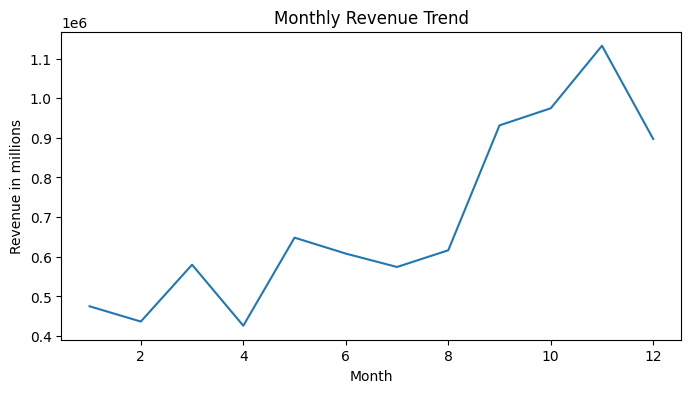

In [ ]:
#line plot monthly revenue
plt.figure(figsize=(8,4))
sns.lineplot(x = 'Month', y = 'Revenue', data = df1_revnue_monthly)
plt.xlabel('Month')
plt.ylabel('Revenue in millions')
plt.title('Monthly Revenue Trend')
#plt.savefig('Monthly Revenue Trend.jpg')
plt.show()

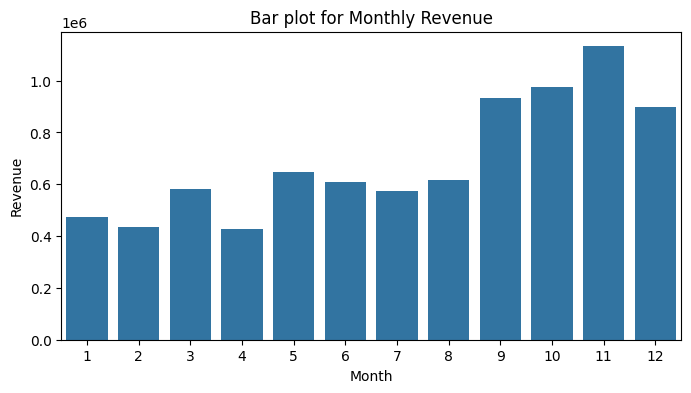

In [ ]:
#bar graph for monthly revenue
plt.figure(figsize=(8,4))
sns.barplot(x = 'Month', y = 'Revenue', data = df1_revnue_monthly)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Bar plot for Monthly Revenue')
#plt.savefig('Monthly Revenue Bar Graph.jpg')
plt.show()


#### **It is observed that Q4 has the highest sales**

In [ ]:
#Monthly Avg Revenue
df1_Avg_revnue_Monthly = df1.groupby('Month')['Revenue'].mean().reset_index()
df1_Avg_revnue_Monthly

,Month,Revenue
0,1,21.681014
1,2,21.438204
2,3,20.845540
3,4,18.365715
4,5,22.424626
5,6,21.842691
6,7,20.879881
7,8,22.282120
8,9,22.817118
9,10,19.224846


In [ ]:
# Extracting yearly revenue
df1_revnue_yearly = df1.groupby('Year')['Revenue'].sum().reset_index()
df1_revnue_yearly

,Year,Revenue
0,2010,554604.020
1,2011,7745461.794


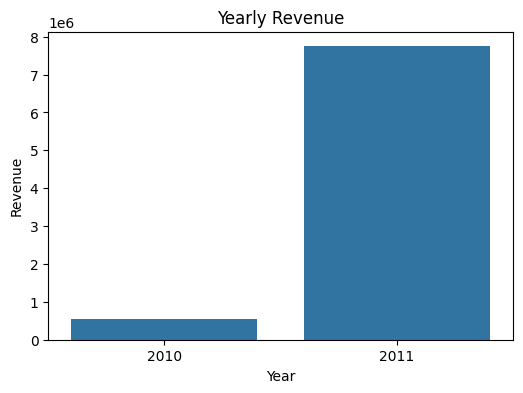

In [ ]:
#bar graph for yearly revenue
# Bar plot for yearly revenue
plt.figure(figsize=(6,4))
sns.barplot(x = 'Year', y = 'Revenue', data = df1_revnue_yearly)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Yearly Revenue')
#plt.savefig('Yearly Revenue.jpg')
plt.show()


In [ ]:
# Monthly Growth rate month to month
df1_revnue_monthly['Monthly_Growth'] = df1_revnue_monthly['Revenue'].pct_change()
df1_revnue_monthly

,Month,Revenue,Monthly_Growth
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [ ]:
df1_revnue_monthly['Monthly_Growth'] = df1_revnue_monthly['Monthly_Growth'].fillna(0)
df1_revnue_monthly


,Month,Revenue,Monthly_Growth
0,1,475074.380,0.000000
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [ ]:
#monthly growth in %
df1_revnue_monthly['Monthly_Growth_Percentage'] = df1_revnue_monthly['Monthly_Growth'] * 100
df1_revnue_monthly


,Month,Revenue,Monthly_Growth,Monthly_Growth_Percentage
0,1,475074.380,0.000000,0.000000
1,2,436546.150,-0.081099,-8.109936
2,3,579964.610,0.328530,32.852989
3,4,426047.851,-0.265390,-26.538992
4,5,648251.080,0.521545,52.154524
5,6,608013.160,-0.062072,-6.207150
6,7,574238.481,-0.055549,-5.554926
7,8,616368.000,0.073366,7.336589
8,9,931440.372,0.511176,51.117575
9,10,974603.590,0.046340,4.634029


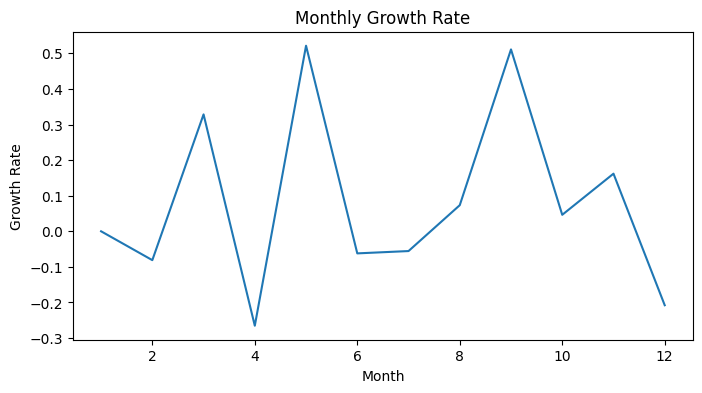

In [ ]:
#Monthly Growth rate
#line plot monthly revenue
plt.figure(figsize=(8,4))
sns.lineplot(x = 'Month', y = 'Monthly_Growth', data = df1_revnue_monthly)
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.title('Monthly Growth Rate')
#plt.savefig('Monthly_Growth.jpg')
plt.show()

##### **Observation**

##### **People not intrested in purchasing, During April month so sales decreses rapidly., During may month, people intrested in purchasing, so sales rises all time high 52%**

In [ ]:
#Monthly active customers(Unique customers)
df1_monthly_active_customers = df1.groupby('Month')['CustomerID'].nunique().reset_index()
df1_monthly_active_customers

,Month,CustomerID
0,1,783
1,2,798
2,3,1020
3,4,899
4,5,1079
5,6,1051
6,7,993
7,8,980
8,9,1302
9,10,1425


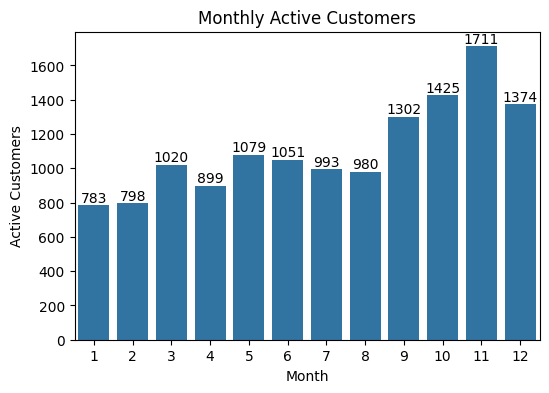

In [ ]:
# Bar plot for Monthly active customers
plt.figure(figsize=(6, 4))
sns.barplot(x="Month", y="CustomerID", data=df1_monthly_active_customers)
plt.xlabel("Month")
plt.ylabel("Active Customers")
plt.title("Monthly Active Customers")

# Add labels to the bars
for i in range(len(df1_monthly_active_customers)):
    plt.text(i, df1_monthly_active_customers["CustomerID"][i], df1_monthly_active_customers["CustomerID"][i], ha="center", va="bottom")

#plt.savefig('Monthly active customers.jpg')
plt.show()


##### **Like wise sales., In Q4, Customers are more acive**

In [ ]:
#Total unique orders by month
df1_monthly_orders = df1.groupby('Month')['InvoiceNo'].nunique().reset_index()
df1_monthly_orders


,Month,InvoiceNo
0,1,1236
1,2,1202
2,3,1619
3,4,1384
4,5,1849
5,6,1707
6,7,1593
7,8,1544
8,9,2078
9,10,2263


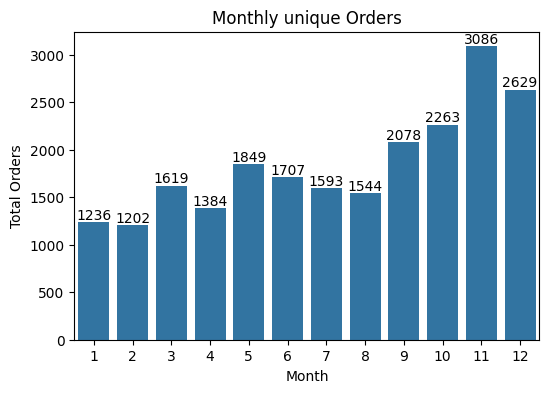

In [ ]:
# Bar plot for Monthly orders
plt.figure(figsize=(6, 4))
sns.barplot(x="Month", y="InvoiceNo", data=df1_monthly_orders)
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.title("Monthly unique Orders")

# Add labels to the bars
for i in range(len(df1_monthly_orders)):
    plt.text(i, df1_monthly_orders["InvoiceNo"][i], df1_monthly_orders["InvoiceNo"][i], ha="center", va="bottom")

#plt.savefig('Monthly unique Orders.jpg')
plt.show()


##### **It is observed we have 3000+ orders(peak) in November**

In [ ]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Year,Month,Day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34


In [ ]:
#Total Quantities purchased by month
df1_monthly_quantity = df1.groupby('Month')['Quantity'].sum().reset_index()
df1_monthly_quantity


,Month,Quantity
0,1,269379
1,2,262833
2,3,344012
3,4,278585
4,5,367852
5,6,356922
6,7,363418
7,8,386612
8,9,537496
9,10,569666


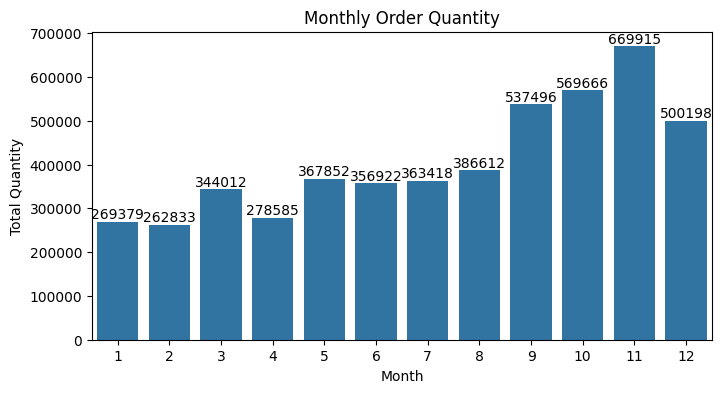

In [ ]:
# Bar plot for Monthly Quantity Purchased
plt.figure(figsize=(8, 4))
sns.barplot(x="Month", y="Quantity", data=df1_monthly_quantity)
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.title("Monthly Order Quantity")

# Add labels to the bars
for i in range(len(df1_monthly_quantity)):
    plt.text(i, df1_monthly_quantity["Quantity"][i], df1_monthly_quantity["Quantity"][i], ha="center", va="bottom")

plt.savefig('Monthly Order Quantity.jpg')
plt.show()


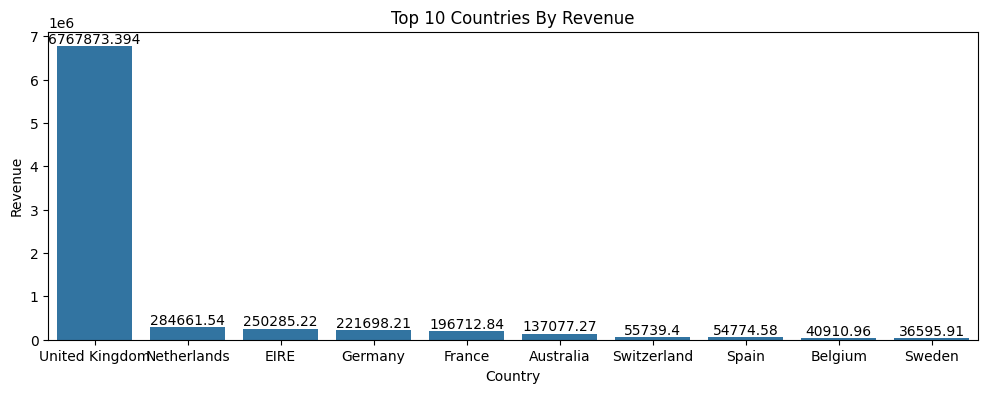

In [ ]:
# Revenue by Country top 10 out of 37
df1_revenue_country = df1.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()
df1_revenue_country.head(10)

# Bar plot for Top 10 Countries by Revenue
plt.figure(figsize=(12, 4))
sns.barplot(x="Country", y="Revenue", data=df1_revenue_country.head(10))
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.title("Top 10 Countries By Revenue")

# Add labels to the bars
for i in range(len(df1_revenue_country.head(10))):
    plt.text(i, df1_revenue_country.head(10)["Revenue"][i], df1_revenue_country.head(10)["Revenue"][i], ha="center", va="bottom")

plt.savefig('Top 10 Countries By Revenue.jpg')
plt.show()


## **Filtering Operations**

In [ ]:
#Finding the each Customer 1st Purchase
df1_first_purchase = df1.groupby('CustomerID')['Date'].min().reset_index()
df1_first_purchase.columns = ['CustomerID', 'First_Purchase_Date']
df1_first_purchase.head()

,CustomerID,First_Purchase_Date
0,12346.0,2011-01-18
1,12347.0,2010-12-07
2,12348.0,2010-12-16
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
#finding perticular customer (12360) first purchase
df1_first_purchase[df1_first_purchase['CustomerID'] == 12360]


,CustomerID,First_Purchase_Date
13,12360.0,2011-05-23


In [ ]:
#First Purchase month
df1_first_purchase['First_Purchase_Month'] = df1_first_purchase['First_Purchase_Date'].apply(lambda x: x.month)
df1_first_purchase.head()

,CustomerID,First_Purchase_Date,First_Purchase_Month
0,12346.0,2011-01-18,1
1,12347.0,2010-12-07,12
2,12348.0,2010-12-16,12
3,12349.0,2011-11-21,11
4,12350.0,2011-02-02,2


In [ ]:
#Joining it to Original Data Frame
df1 = df1.merge(df1_first_purchase, on='CustomerID')
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Year,Month,Day,Revenue,First_Purchase_Date,First_Purchase_Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,15.30,2010-12-01,12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,2010-12-01,12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,22.00,2010-12-01,12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,2010-12-01,12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,2010-12-01,12


In [ ]:
#Dropping time Column
df1=df1.drop(['Time'],axis=1)
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,Revenue,First_Purchase_Date,First_Purchase_Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,1,15.30,2010-12-01,12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,1,22.00,2010-12-01,12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12


In [ ]:
#Filtering Existing and New Customers
df1['UserType'] = 'New'
df1.loc[df1['Month'] > df1['First_Purchase_Month'], 'UserType'] = 'Existing'
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,Revenue,First_Purchase_Date,First_Purchase_Month,UserType
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,1,15.30,2010-12-01,12,New
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12,New
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,1,22.00,2010-12-01,12,New
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12,New
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12,New


In [ ]:
df1['UserType'].value_counts()

UserType
New         269613
Existing    137216
Name: count, dtype: int64

In [ ]:
#Revenue by month by New and Existing Customers
df1_revenue_by_user = df1.groupby(['Month', 'UserType'])['Revenue'].sum().reset_index()
df1_revenue_by_user

,Month,UserType,Revenue
0,1,New,475074.380
1,2,Existing,56168.550
2,2,New,380377.600
3,3,Existing,87525.140
4,3,New,492439.470
5,4,Existing,105355.620
6,4,New,320692.231
7,5,Existing,210780.630
8,5,New,437470.450
9,6,Existing,202592.290


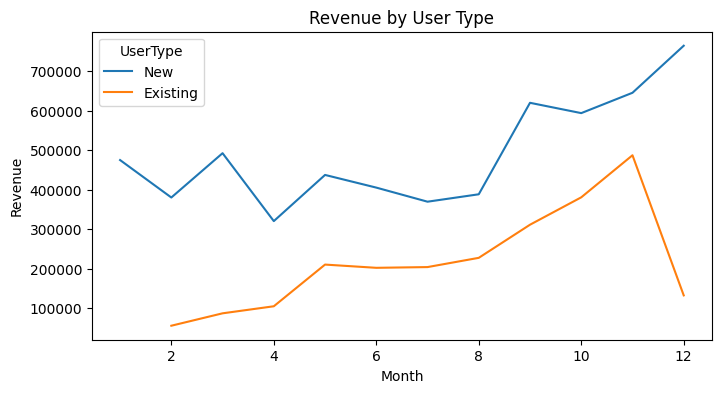

In [ ]:
#Line Plot For revenue by user monthly
fig,axes = plt.subplots(figsize=(8, 4))
ax = sns.lineplot(x='Month', y='Revenue', hue='UserType', data=df1_revenue_by_user)
ax.set_title('Revenue by User Type')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue')
fig=plt.gcf()
#fig.savefig('Revenue by User Type.jpg')
plt.show()

##### **By Oserving the Graph, Existing Customers are not intresetd to Purchase the Products. We need to Retain the Customers**

##### **Retension of Customers**

In [ ]:
#Obesrving the Customers who are active in each Monthl
df1_customer_purchase = df1.groupby(['CustomerID', 'Month'])['Revenue'].sum().reset_index()
df1_customer_purchase.head()

,CustomerID,Month,Revenue
0,12346.0,1,0.00
1,12347.0,1,475.39
2,12347.0,4,636.25
3,12347.0,6,382.52
4,12347.0,8,584.91


In [ ]:
#Cross Table
df1_customer_retension = pd.crosstab(df1_customer_purchase['CustomerID'], df1_customer_purchase['Month']).reset_index()
df1_customer_retension

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
0,12346.0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,0,0,1,0,0,0,0,1,0,0,1
3,12349.0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,0,0,1,0,0,0,0,0,0,0,0,0
4368,18281.0,0,0,0,0,0,1,0,0,0,0,0,0
4369,18282.0,0,0,0,0,0,0,0,1,0,0,0,1
4370,18283.0,1,1,0,1,1,1,1,0,1,1,1,1


#### **So Existing Customers are not visiting the store regularly**

In [ ]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,Revenue,First_Purchase_Date,First_Purchase_Month,UserType
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,1,15.30,2010-12-01,12,New
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12,New
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,1,22.00,2010-12-01,12,New
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12,New
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12,New


In [ ]:
#Work done So Far

#df1_revnue_monthly
#df1_Avg_revnue_Monthly
#df1_revnue_yearly
#df1_monthly_active_customers
#df1_monthly_orders
#df1_monthly_quantity
#df1_revenue_country
#df1_first_purchase
#df1_revenue_by_user
#df1_customer_retension

##### ***STEP-3***
## **Feature Engineering**

In [ ]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,Revenue,First_Purchase_Date,First_Purchase_Month,UserType
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,1,15.30,2010-12-01,12,New
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12,New
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,1,22.00,2010-12-01,12,New
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12,New
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,20.34,2010-12-01,12,New


As we have Lot of features for our Data frame, But All features are not required for Final Model Building.., Some important features are,,
**'CustomerID', 'Date', 'Month', 'Revenue'** these are enough for Predicting feature revenue according to our Business requirement

In [23]:
df2 = df1.sort_values(by=["InvoiceDate"])

In [25]:
#dataframe contains daily revenue total

daily_revenue = df2.groupby('Date')['Revenue'].sum().reset_index()
#First 10 days sales Revenue
daily_revenue.set_index('Date',inplace=True)
daily_revenue.head(10)

,Revenue
Date,
2010-12-01,46051.26
2010-12-02,45775.43
2010-12-03,22598.46
2010-12-05,31380.60
2010-12-06,30465.08
2010-12-07,53125.99
2010-12-08,38048.68
2010-12-09,37177.85
2010-12-10,32005.35


In [26]:
daily_revenue.shape

(305, 1)

Saving into CSV file

In [27]:
daily_revenue.to_csv('Final_data.csv')